In [1]:
### Titanic Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

titanic = sns.load_dataset("titanic")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### import necessary packages
### load the Titanic dataset from seaborn

In [2]:
### Titanic Data

titanic.head(20)

### showing 20 lines

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### survived: 
0 = No, 1 = Yes


### pclass (Ticket class): 
1 = upper, 2 = middle, 3 = lower


### sibsp (# of siblings (brother, sister, stepbrother, stepsister) / spouses (husband, wife) aboard the Titanic)



### parch (# of parents / children aboard the Titanic): 
Parent = mother, father. 

Child = daughter, son, stepdaughter, stepson. 

Some children travelled only with a nanny, therefore parch=0 for them.


### embarked (Port of Embarkation):	
C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
### Titanic Data

titanic.info()

### showing the columns & data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
### Titanic Data

missing_values = titanic.isnull().sum()

print(missing_values[missing_values > 0]) 

#### check for missing values

age            177
embarked         2
deck           688
embark_town      2
dtype: int64


In [5]:
### Titanic Data

age_nulls = titanic[titanic['age'].isnull()]

age_nulls.head(20)

### filter rows where 'age' is null just to have an idea

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
29,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
32,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
36,1,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,yes,True
42,0,3,male,NaN,0,0,7.8958,C,Third,man,True,NaN,Cherbourg,no,True


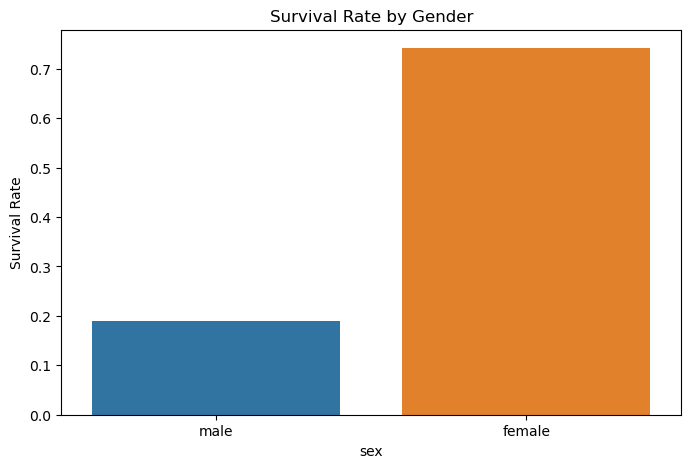

In [13]:
## Good Visualizations 

plt.figure(figsize=(8,5))
sns.barplot(x="sex", y="survived", data=titanic, ci=None)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

### bar chart: survival rate by gender
### simple, clear comparison of survival rates between genders
### highlights that females had significantly higher survival rate than males (about 70% (f) vs 20% (m))

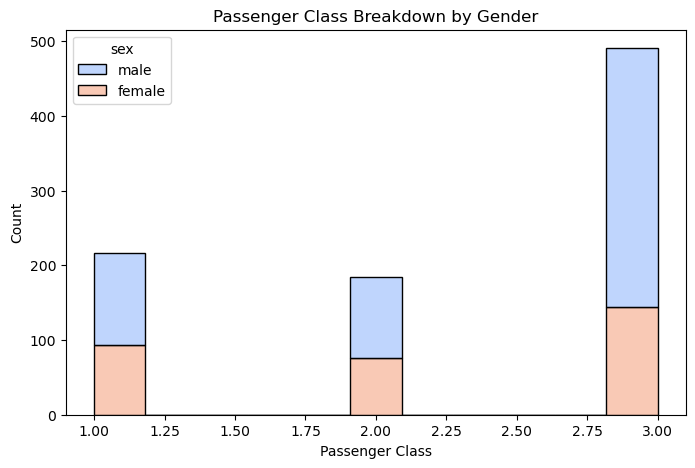

In [6]:
## Good Visualizations 

plt.figure(figsize=(8,5))
sns.histplot(data=titanic, x="pclass", hue="sex", multiple="stack", palette="coolwarm")
plt.title("Passenger Class Breakdown by Gender")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

### stacked bar chart: gender vs. passenger class & survival
### effectively shows the distribution of gender within each passenger class with color differentiation.

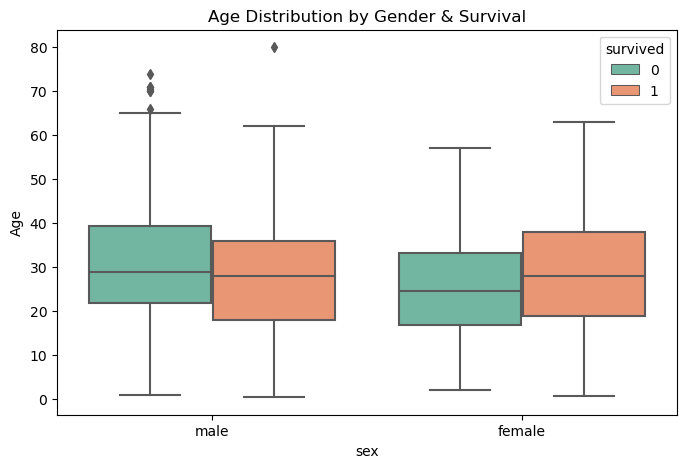

In [7]:
## Good Visualizations 

plt.figure(figsize=(8,5))
sns.boxplot(x="sex", y="age", hue="survived", data=titanic, palette="Set2")
plt.title("Age Distribution by Gender & Survival")
plt.ylabel("Age")
plt.show()

### box plot: age distribution by gender & survival
### displays the distribution of age, highlighting medians, quartiles, and outliers by gender and survival.

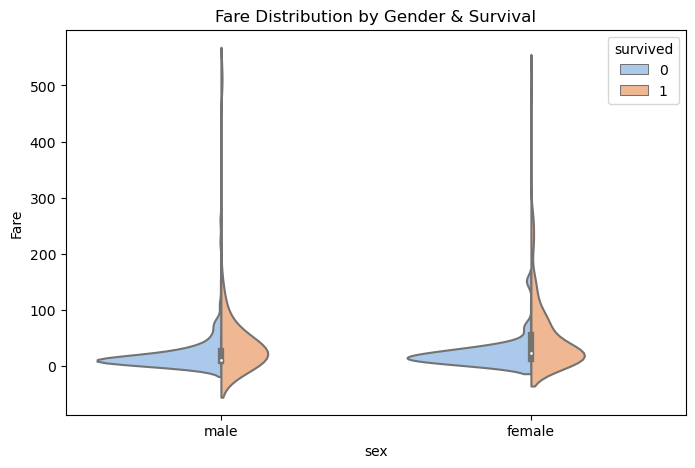

In [8]:
## Good Visualizations 

plt.figure(figsize=(8,5))
sns.violinplot(x="sex", y="fare", hue="survived", data=titanic, split=True, palette="pastel")
plt.title("Fare Distribution by Gender & Survival")
plt.ylabel("Fare")
plt.show()

### violin plot: fare paid by gender & survival
### combines boxplot and density plot to show the fare distribution by gender and survival, with a clear contrast.

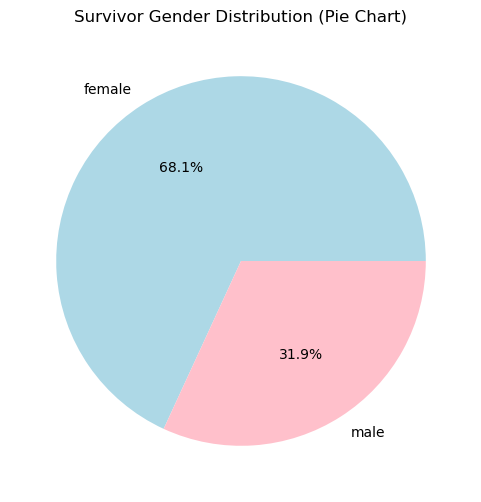

In [9]:
## Bad Visualizations  

plt.figure(figsize=(6,6))
titanic.groupby("sex")["survived"].sum().plot(kind="pie", autopct="%1.1f%%", colors=["lightblue", "pink"])
plt.title("Survivor Gender Distribution (Pie Chart)")
plt.ylabel("") 
plt.show()

### pie chart: gender distribution of survivors
### pie charts are unnecessary here, and a bar chart would be clearer.

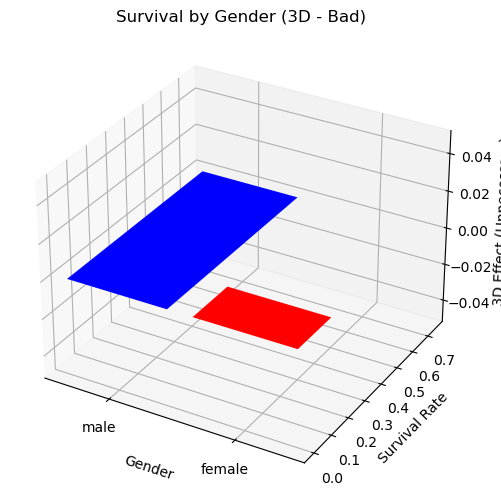

In [10]:
## Bad Visualizations  

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
genders = ["male", "female"]
survivals = titanic.groupby("sex")["survived"].mean()
ax.bar(genders, survivals, color=["blue", "red"])
ax.set_xlabel("Gender")
ax.set_ylabel("Survival Rate")
ax.set_zlabel("3D Effect (Unnecessary)")
plt.title("Survival by Gender (3D - Bad)")
plt.show()

### 3D bar chart: survival by gender
### 3D adds complexity without providing extra value, making the chart harder to read.

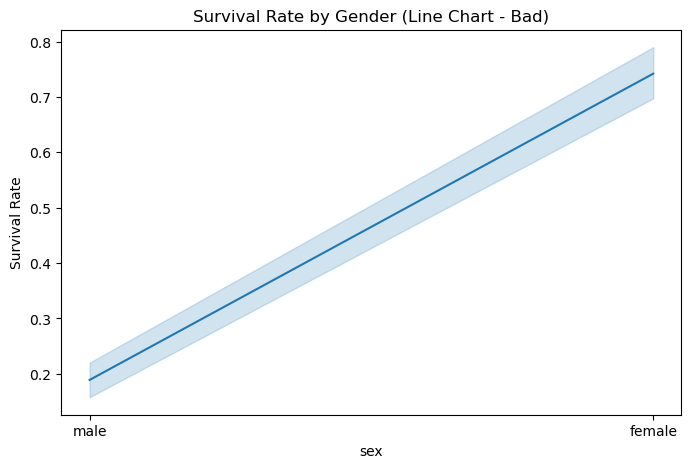

In [11]:
## Bad Visualizations  

plt.figure(figsize=(8,5))
sns.lineplot(x="sex", y="survived", data=titanic)
plt.title("Survival Rate by Gender (Line Chart - Bad)")
plt.ylabel("Survival Rate")
plt.show()

### line chart: gender vs. survival rate
### line charts are for continuous data, not categorical data like gender, misleading the interpretation.

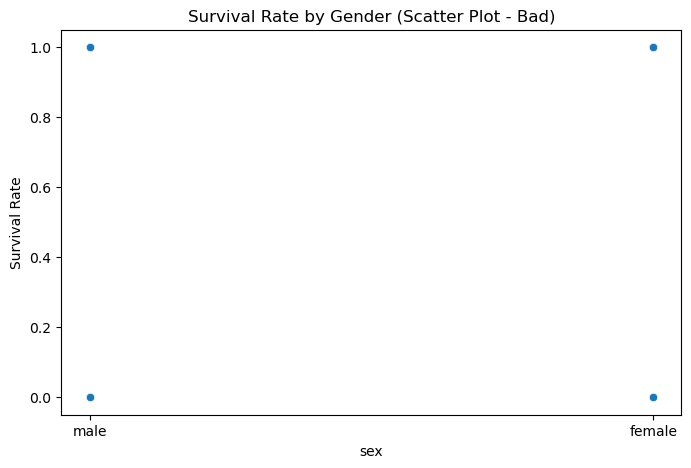

In [12]:
## Bad Visualizations  

plt.figure(figsize=(8,5))
sns.scatterplot(x="sex", y="survived", data=titanic)
plt.title("Survival Rate by Gender (Scatter Plot - Bad)")
plt.ylabel("Survival Rate")
plt.show()

### scatter Plot: gender vs. survival rate
### scatter plots are for continuous variables, and here it overcomplicates the data without providing insights.